# Imports

In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [49]:
# loading data
data_frame = pd.read_csv(r'./DATA/H2HBABBA3195.csv')

In [50]:
data_frame.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200779906,BOZZU corporation,2019-03-28 00:00:00,2019.0,1.928941e+09,2019-03-12,20190310,20190312,20190327.0,USD,RV,1.0,NaN,44468.83,20190312.0,NAA8,1.928941e+09,0
1,U001,0200769623,WAL-MAR associates,2019-04-03 00:00:00,2019.0,1.929015e+09,2019-03-24,20190323,20190324,20190408.0,USD,RV,1.0,NaN,4013.75,20190324.0,NAH4,1.929015e+09,0
2,U001,0200772670,ASSOCIAT corp,2019-05-22 00:00:00,2019.0,1.929268e+09,2019-05-06,20190506,20190506,20190521.0,USD,RV,1.0,NaN,77909.09,20190506.0,NAU5,1.929268e+09,0
3,U001,0100044041,DEF. F co,2020-03-02 00:00:00,2020.0,1.930548e+09,2020-02-20,20200220,20200220,20200310.0,USD,RV,1.0,NaN,2459.37,20200216.0,NAM4,1.930548e+09,0
4,U001,0200705742,DOT corporation,2019-05-15 00:00:00,2019.0,1.929234e+09,2019-04-30,20190430,20190430,20190603.0,USD,RV,1.0,NaN,10073.68,20190430.0,NAAW,1.929234e+09,0


In [51]:
data_frame.nunique(axis=0)

business_code                 6
cust_number                1394
name_customer              4195
clear_date                  402
buisness_year                 2
doc_id                    48806
posting_date                507
document_create_date        509
document_create_date.1      507
due_in_date                 545
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44262
baseline_create_date        509
cust_payment_terms           75
invoice_id                48802
isOpen                        2
dtype: int64

In [52]:
data_frame['cust_payment_terms'].value_counts()

NAA8    20052
NAH4    13697
CA10     3726
NAC6     1774
NAM4     1369
        ...  
NATX        1
NATL        1
MC15        1
NAV2        1
NAUI        1
Name: cust_payment_terms, Length: 75, dtype: int64

In [53]:
df = data_frame[data_frame.clear_date.isnull()]
df.shape

(10000, 19)

In [54]:
data_frame.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.007851,0.977120,0.983620,0.988944,NaN,NaN,0.001232,0.983986,-0.006627,0.750550
doc_id,-0.007851,1.000000,-0.004729,-0.006722,-0.010245,NaN,NaN,0.191287,-0.004197,1.000000,-0.006992
document_create_date,0.977120,-0.004729,1.000000,0.993404,0.973043,NaN,NaN,0.004664,0.992660,-0.003320,0.760251
document_create_date.1,0.983620,-0.006722,0.993404,1.000000,0.978904,NaN,NaN,0.003409,0.999250,-0.005299,0.760350
due_in_date,0.988944,-0.010245,0.973043,0.978904,1.000000,NaN,NaN,0.000899,0.979473,-0.008889,0.750627
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.001232,0.191287,0.004664,0.003409,0.000899,NaN,NaN,1.000000,0.004271,0.197607,0.009850
baseline_create_date,0.983986,-0.004197,0.992660,0.999250,0.979473,NaN,NaN,0.004271,1.000000,-0.002698,0.760312
invoice_id,-0.006627,1.000000,-0.003320,-0.005299,-0.008889,NaN,NaN,0.197607,-0.002698,1.000000,-0.006106


## Dropping blank and unwanted columns

In [55]:
# name_customer can be identified by cust_number also contains anomalies
# doc_id and invoice_id have very high correlation hence deleting invoice_id
# document type is almost constant with just only 0.008% reading having a different value 
# posting_id is constant column
# area_business is empty
# dropping isOpen as open invoices have NULL values in clear_date

data_frame.drop(['document_create_date.1','name_customer','invoice_id','document type','posting_id','area_business','isOpen'],axis=1,inplace=True)

In [56]:
# removing duplicate rows (based on invoice_id)
data_frame.drop_duplicates(subset='doc_id',keep='first',inplace=True)

In [57]:
# checking Nulls in columns for Null Imputation
data_frame.isna().sum()

business_code              0
cust_number                0
clear_date              9690
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [83]:
# dividing data into final_test and train based on clear_date parameter being NULL
final_test = data_frame[data_frame.clear_date.isnull()]
main_train = data_frame[data_frame.clear_date.isnull()==False]

In [84]:
main_train['doc_id'].value_counts()

1.929488e+09    1
1.929562e+09    1
1.929021e+09    1
1.930516e+09    1
1.930384e+09    1
               ..
1.929173e+09    1
1.929223e+09    1
1.930352e+09    1
1.928565e+09    1
1.930303e+09    1
Name: doc_id, Length: 39116, dtype: int64

In [85]:
# creating binary lable for business_code
main_train['business_code'] = np.where(main_train['business_code'].isin(['U001','CA02']),main_train['business_code'],'OTHR')


In [86]:
main_train['clear_date'] = pd.to_datetime(main_train['clear_date'])
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'])

In [87]:
def convert_to_date(df,attribute):
    df[attribute] = pd.to_datetime(df[attribute], format='%Y%m%d')
    

In [88]:
convert_to_date(main_train,'document_create_date')
convert_to_date(main_train,'baseline_create_date')
convert_to_date(main_train,'due_in_date')


In [89]:
print(main_train.dtypes)

business_code                   object
cust_number                     object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object


In [90]:
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(['NAA8','NAH4','CA10','NAC6','NAM4']),main_train['cust_payment_terms'],'OTHR')    

In [91]:
main_train['total_open_amount'] = np.where(main_train['invoice_currency'].isin(['USD']),main_train['total_open_amount'],main_train['total_open_amount']*0.81)

In [92]:
main_train['target'] = (main_train['clear_date'] - main_train['document_create_date']).dt.days

In [93]:
main_train['expected'] = (main_train['due_in_date'] - main_train['document_create_date']).dt.days

In [94]:
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,target,expected
0,U001,0200779906,2019-03-28,2019.0,1.928941e+09,2019-03-12,2019-03-10,2019-03-27,USD,44468.83,2019-03-12,NAA8,18,17
1,U001,0200769623,2019-04-03,2019.0,1.929015e+09,2019-03-24,2019-03-23,2019-04-08,USD,4013.75,2019-03-24,NAH4,11,16
2,U001,0200772670,2019-05-22,2019.0,1.929268e+09,2019-05-06,2019-05-06,2019-05-21,USD,77909.09,2019-05-06,OTHR,16,15
3,U001,0100044041,2020-03-02,2020.0,1.930548e+09,2020-02-20,2020-02-20,2020-03-10,USD,2459.37,2020-02-16,NAM4,11,19
4,U001,0200705742,2019-05-15,2019.0,1.929234e+09,2019-04-30,2019-04-30,2019-06-03,USD,10073.68,2019-04-30,OTHR,15,34


In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
business_code_en = LabelEncoder()
business_code_en.fit(main_train['business_code'])
main_train['business_code'] = business_code_en.transform(main_train['business_code'])

In [97]:
cust_number_en = LabelEncoder()
cust_number_en.fit(main_train['cust_number'])
main_train['cust_number'] = cust_number_en.transform(main_train['cust_number'])

In [98]:
invoice_currency_en = LabelEncoder()
invoice_currency_en.fit(main_train['invoice_currency'])
main_train['invoice_currency'] = invoice_currency_en.transform(main_train['invoice_currency'])

In [99]:
cust_payment_terms_en = LabelEncoder()
cust_payment_terms_en.fit(main_train['cust_payment_terms'])
main_train['cust_payment_terms'] = cust_payment_terms_en.transform(main_train['cust_payment_terms'])

In [100]:
main_train['day_of_week'] = main_train['document_create_date'].dt.weekday
main_train['month'] = main_train['document_create_date'].dt.month

In [101]:
main_train.sort_values(by=['document_create_date'])

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,target,expected,day_of_week,month
33189,1,324,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,2019-01-29,1,10045.2300,2018-12-30,5,28,34,2,12
29220,2,909,2019-01-22,2019.0,1.928533e+09,2019-01-02,2018-12-29,2019-01-17,1,31035.3300,2019-01-02,1,24,19,5,12
5902,2,592,2019-01-23,2019.0,1.928533e+09,2019-01-03,2018-12-29,2019-01-23,1,20434.3900,2019-01-03,5,25,25,5,12
11749,2,895,2019-01-15,2019.0,1.928537e+09,2018-12-31,2018-12-29,2019-01-15,1,38680.2000,2018-12-31,1,17,17,5,12
37520,2,804,2019-01-18,2019.0,1.928535e+09,2019-01-02,2018-12-29,2019-01-17,1,18769.7400,2019-01-02,3,20,19,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39802,2,948,2020-03-16,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,1,56061.3900,2020-02-26,1,18,14,3,2
45040,1,309,2020-03-24,2020.0,1.991839e+09,2020-02-07,2020-02-27,2020-03-08,1,75816.0000,2020-02-07,5,26,10,3,2
29507,2,945,2020-03-13,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-03-13,1,35655.9000,2020-02-27,1,14,14,4,2
28808,2,1329,2020-03-27,2020.0,1.930582e+09,2020-02-19,2020-02-28,2020-02-19,1,18768.0000,2020-02-19,5,28,-9,4,2


In [102]:
main_train.drop(['buisness_year','doc_id','posting_date','document_create_date','due_in_date','baseline_create_date','clear_date'],axis=1,inplace=True)

In [103]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       39116 non-null  int64  
 1   cust_number         39116 non-null  int64  
 2   invoice_currency    39116 non-null  int64  
 3   total_open_amount   39116 non-null  float64
 4   cust_payment_terms  39116 non-null  int64  
 5   target              39116 non-null  int64  
 6   expected            39116 non-null  int64  
 7   day_of_week         39116 non-null  int64  
 8   month               39116 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.0 MB


In [104]:
X = main_train.drop('target',axis=1)
Y = main_train['target']

from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,Y,test_size=0.3,random_state=0 , shuffle = False)


<AxesSubplot:xlabel='target', ylabel='Density'>

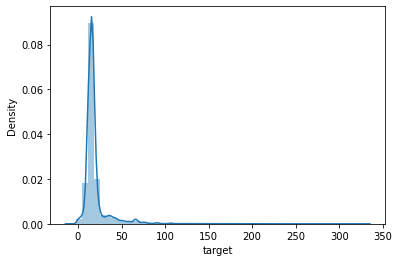

In [105]:
sns.distplot(y_train)

In [106]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)


LinearRegression()

In [107]:
y_predict = base_model.predict(X_inter_test)

In [108]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_inter_test, y_predict, squared=False)

9.818761150706852

In [117]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=7)

In [118]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

In [119]:
y_predict2 = regressor.predict(X_inter_test)

In [120]:
mean_squared_error(y_inter_test, y_predict2, squared=False)

8.538600585757502